In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')


In [2]:
!kaggle datasets download -d vishalsubbiah/pokemon-images-and-types
!unzip pokemon-images-and-types.zip

Dataset URL: https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/3.68M [00:00<?, ?B/s]
100% 3.68M/3.68M [00:00<00:00, 167MB/s]
Archive:  pokemon-images-and-types.zip
  inflating: images/abomasnow.png    
  inflating: images/abra.png         
  inflating: images/absol.png        
  inflating: images/accelgor.png     
  inflating: images/aegislash-blade.png  
  inflating: images/aerodactyl.png   
  inflating: images/aggron.png       
  inflating: images/aipom.png        
  inflating: images/alakazam.png     
  inflating: images/alomomola.png    
  inflating: images/altaria.png      
  inflating: images/amaura.png       
  inflating: images/ambipom.png      
  inflating: images/amoonguss.png    
  inflating: images/ampharos.png     
  inflating: images/anorith.png      
  inflating: images/araquanid.png    
  inflating: images/arbok.png        
  inflating: images/arcanine.png     
  inflating: images/arceu

In [3]:
!pip install tensorflow keras numpy pandas matplotlib seaborn

##EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('pokemon.csv')

In [3]:
data.head()

,Name,Type1,Type2,Evolution
0,bulbasaur,Grass,Poison,ivysaur
1,ivysaur,Grass,Poison,venusaur
2,venusaur,Grass,Poison,NaN
3,charmander,Fire,NaN,charmeleon
4,charmeleon,Fire,NaN,charizard


In [8]:
data['Type1'].unique()

array([ 9,  6, 17,  0, 12, 13,  3, 10,  4,  5, 14, 15,  8, 11,  2,  1, 16,
        7])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       809 non-null    object
 1   Type1      809 non-null    object
 2   Type2      405 non-null    object
 3   Evolution  32 non-null     object
dtypes: object(4)
memory usage: 25.4+ KB


In [ ]:
data.describe()

,Name,Type1,Type2,Evolution
count,809,809,405,32
unique,809,18,18,32
top,bulbasaur,Water,Flying,ivysaur
freq,1,114,95,1


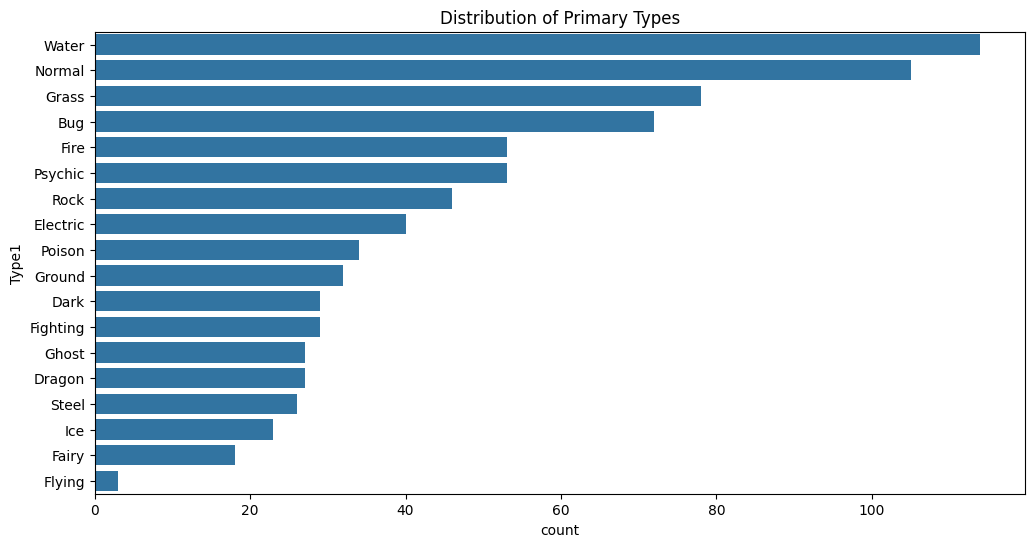

In [ ]:
# Countplot for Primary Types
plt.figure(figsize=(12, 6))
sns.countplot(y='Type1', data=data, order=data['Type1'].value_counts().index)
plt.title('Distribution of Primary Types')
plt.show()

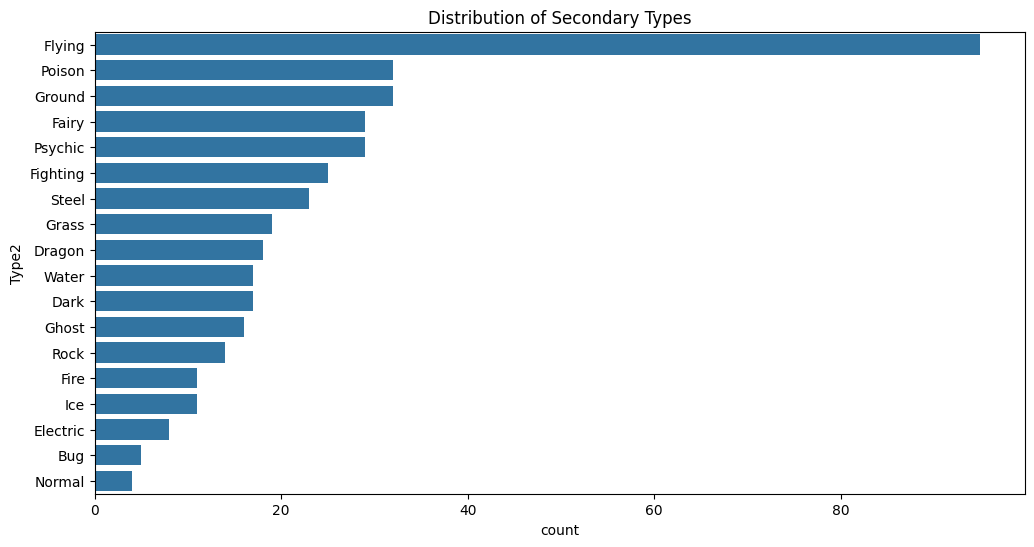

In [ ]:
# Countplot for Secondary Types
plt.figure(figsize=(12, 6))
sns.countplot(y='Type2', data=data, order=data['Type2'].value_counts().index)
plt.title('Distribution of Secondary Types')
plt.show()

## Preprocessing the data

In [4]:
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [5]:
# Initialize LabelEncoders
label_encoder_type1 = LabelEncoder()
label_encoder_type2 = LabelEncoder()

In [6]:
# Encode primary and secondary types
data['Type1'] = label_encoder_type1.fit_transform(data['Type1'])
data['Type2'] = label_encoder_type2.fit_transform(data['Type2'])

In [7]:
data.head()

,Name,Type1,Type2,Evolution
0,bulbasaur,9,13,ivysaur
1,ivysaur,9,13,venusaur
2,venusaur,9,13,NaN
3,charmander,6,18,charmeleon
4,charmeleon,6,18,charizard


In [13]:
image_size = (120, 120)

# ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,          # Normalize the images
    rotation_range=20,       # Randomly rotate images in the range (degrees, 0 to 180)
    shear_range=0.2,         # Shear intensity (shear angle in counter-clockwise direction in degrees)
    zoom_range=0.2,          # Randomly zoom images
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill mode for new pixels created by transformations
)

In [12]:
image_size= (120,120)
# Function to preprocess a single image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=image_size)  # Resize images
    image = img_to_array(image)
    return image

In [13]:
image_folder = './images'
data['img_path'] = data['Name'].apply(lambda x: os.path.join(image_folder, f"{x}.png"))
data['img'] = data['img_path'].apply(preprocess_image)

In [14]:
print(data['img'])

0      [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
1      [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
2      [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
3      [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
4      [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
                             ...                        
804    [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
805    [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
806    [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
807    [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
808    [[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...
Name: img, Length: 809, dtype: object


In [15]:
print(data['Type1'])

0       9
1       9
2       9
3       6
4       6
       ..
804    15
805     6
806     3
807    16
808    16
Name: Type1, Length: 809, dtype: int32


##Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

In [16]:
# Prepare data for model training
X = np.array(data['img'].tolist())

In [17]:
print(X)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0

In [18]:
y_type1 = data['Type1'].values
y_type2 = data['Type2'].values

In [19]:
print(y_type1)

[ 9  9  9  6  6  6 17 17 17  0  0  0  0  0  0 12 12 12 12 12 12 12 13 13
  3  3 10 10 13 13 13 13 13 13  4  4  6  6 12 12 13 13  9  9  9  0  0  0
  0 10 10 12 12 17 17  5  5  6  6 17 17 17 14 14 14  5  5  5  9  9  9 17
 17 15 15 15  6  6 17 17  3  3 12 12 12 17 17 13 13 17 17  8  8  8 15 14
 14 17 17  3  3  9  9 10 10  5  5 12 13 13 10 10 12  9 12 17 17 17 17 17
 17 14  0 11  3  6  0 12 17 17 17 12 12 17  3  6 12 15 15 15 15 15 12 11
  3  6  2  2  2 14 14  9  9  9  6  6  6 17 17 17 12 12 12 12  0  0  0  0
 13 17 17  3  4 12  4  4 14 14  3  3  3  9 17 17 15 17  9  9  9 12  9  9
  0 17 17 14  1  1 17  8 14 14 12  0  0 12 10 16  4  4 17  0  0  0  1 12
 12  6  6 11 11 17 17 17 11 17 16  1  1 17 10 10 12 12 12  5  5 11  3  6
 12 12  3  6 17 15 15 15 14  6 14  9  9  9  6  6  6 17 17 17  1  1 12 12
  0  0  0  0  0 17 17 17  9  9  9 12 12 17 17 14 14 14  0  0  9  9 12 12
 12  0  0  0 12 12 12  5  5 12 15 12 12  1 16 16 16 16  5  5  3  3  3  3
  0  0  9 13 13 17 17 17 17  6  6  6 14 14 12 10 10

In [ ]:
# Split data into training and testing sets

#type1 split
X_train, X_test, y_train_type1, y_test_type1 = train_test_split(X, y_type1, test_size=0.2, random_state=42)

## NOTE: USE SAME RANDOM_STATE FOR BOTH AS X_TRAIN AND X_TEST SHOULD BE SAME

#type2
_, _, y_train_type2, y_test_type2 = train_test_split(X, y_type2, test_size=0.2, random_state=42)

##Applying Transformations to image

In [ ]:
# Applying data augmentation to training images

train_generator_type1 = train_datagen.flow(X_train, y_train_type1, batch_size=32)
train_generator_type2 = train_datagen.flow(X_train, y_train_type2, batch_size=32)

# Validation data should not be augmented
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator_type1 = validation_datagen.flow(X_test, y_test_type1, batch_size=32)
validation_generator_type2 = validation_datagen.flow(X_test, y_test_type2, batch_size=32)

##Model Building

##Learning Rate scheduler

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

initial_learning_rate = 0.01
decay_rate = 0.9

def lr_schedule(epoch):

    lr = initial_learning_rate * decay_rate ** epoch
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

1. a basic ass model

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.initializers import GlorotUniform

def build_model(num_classes):
    model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(120, 120, 3),
           kernel_regularizer=tf.keras.regularizers.l2(l=0.01),
           kernel_initializer=GlorotUniform()),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l=0.01)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
    ])
    return model


In [ ]:
# Primary Type Model
num_type1_classes = len(label_encoder_type1.classes_)
model_type1 = build_model(num_type1_classes)
model_type1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
                                          #sparse because using Label encoder and notOne-hot encoder

model_type1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 59, 59, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 59, 59, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 28, 28, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 28, 28, 64)       

In [ ]:
# Train the model for primary type prediction with data augmentation
history_type1 = model_type1.fit(
    train_generator_type1,
    epochs=30,
    validation_data=validation_generator_type1
)

Epoch 1/30
21/21 [==============================] - 2s 106ms/step - loss: 1.3464 - accuracy: 0.5904 - val_loss: 4.3652 - val_accuracy: 0.1667
Epoch 2/30
21/21 [==============================] - 2s 105ms/step - loss: 1.4196 - accuracy: 0.5858 - val_loss: 3.6878 - val_accuracy: 0.1420
Epoch 3/30
21/21 [==============================] - 3s 135ms/step - loss: 1.3314 - accuracy: 0.6182 - val_loss: 4.1068 - val_accuracy: 0.1914
Epoch 4/30
21/21 [==============================] - 3s 133ms/step - loss: 1.2904 - accuracy: 0.6383 - val_loss: 4.3512 - val_accuracy: 0.1667
Epoch 5/30
21/21 [==============================] - 2s 105ms/step - loss: 1.2133 - accuracy: 0.6414 - val_loss: 4.1597 - val_accuracy: 0.1852
Epoch 6/30
21/21 [==============================] - 2s 106ms/step - loss: 1.2428 - accuracy: 0.6306 - val_loss: 4.2349 - val_accuracy: 0.1605
Epoch 7/30
21/21 [==============================] - 3s 138ms/step - loss: 1.2812 - accuracy: 0.6105 - val_loss: 4.5787 - val_accuracy: 0.1790
Epoch 

In [ ]:

# Secondary Type Model
num_type2_classes = len(label_encoder_type2.classes_)
model_type2 = build_model(num_type2_classes)
model_type2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model for secondary type prediction with data augmentation
history_type2 = model_type2.fit(
    train_generator_type2,
    epochs=10,
    validation_data=validation_generator_type2,
    callbacks =[lr_scheduler]
)

Epoch 1/10
21/21 [==============================] - 4s 106ms/step - loss: 8.4762 - accuracy: 0.4420 - val_loss: 3.6128 - val_accuracy: 0.5247 - lr: 0.0100
Epoch 2/10
21/21 [==============================] - 3s 160ms/step - loss: 3.4201 - accuracy: 0.4930 - val_loss: 3.1851 - val_accuracy: 0.5247 - lr: 0.0090
Epoch 3/10
21/21 [==============================] - 2s 104ms/step - loss: 3.1379 - accuracy: 0.4930 - val_loss: 2.9914 - val_accuracy: 0.5247 - lr: 0.0081
Epoch 4/10
21/21 [==============================] - 2s 108ms/step - loss: 2.9404 - accuracy: 0.4930 - val_loss: 2.8387 - val_accuracy: 0.5247 - lr: 0.0073
Epoch 5/10
21/21 [==============================] - 2s 105ms/step - loss: 2.8157 - accuracy: 0.4930 - val_loss: 2.7392 - val_accuracy: 0.5247 - lr: 0.0066
Epoch 6/10
21/21 [==============================] - 2s 107ms/step - loss: 2.7229 - accuracy: 0.4930 - val_loss: 2.6485 - val_accuracy: 0.5247 - lr: 0.0059
Epoch 7/10
21/21 [==============================] - 3s 152ms/step - lo

In [20]:
# import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(120, 120,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(18)
])
# print model summary and check trainable parameters
model.summary()

C:\Users\anshu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 43200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,320,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 18)             │         1,818 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,342,118 (16.56 MB)

 Trainable params: 4,342,118 (16.56 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# compile model (Use: Adam optimizer, categorical_crossentropy loss and metrics as Accuracy)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
# fit model (use images and labels)
history = model.fit(
    X,y_type1,
    epochs=50
    )

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0631 - loss: 301.1780
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0852 - loss: 4.1422
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.1173 - loss: 3.2313
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.0904 - loss: 2.9808
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1048 - loss: 2.8453
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0955 - loss: 2.8256
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1052 - loss: 2.7974
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.1387 - loss: 2.7791
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.1519 - loss: 2.7686
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1489 - loss: 2.7337
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.1403 - loss: 2.7287
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accurac